In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\Heart Attack.csv")
df.head(5)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
df.shape

(1319, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1319.0,56.191812,13.647315,14.000,47.000,58.000,65.0000,103.0
gender,1319.0,0.659591,0.474027,0.000,0.000,1.000,1.0000,1.0
impluse,1319.0,78.336619,51.630270,20.000,64.000,74.000,85.0000,1111.0
pressurehight,1319.0,127.170584,26.122720,42.000,110.000,124.000,143.0000,223.0
pressurelow,1319.0,72.269143,14.033924,38.000,62.000,72.000,81.0000,154.0
glucose,1319.0,146.634344,74.923045,35.000,98.000,116.000,169.5000,541.0
kcm,1319.0,15.274306,46.327083,0.321,1.655,2.850,5.8050,300.0
troponin,1319.0,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3


In [9]:
df.describe(include="object").T

,count,unique,top,freq
class,1319,2,positive,810


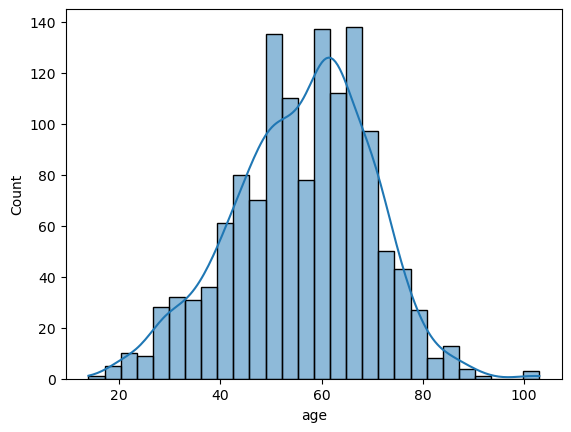

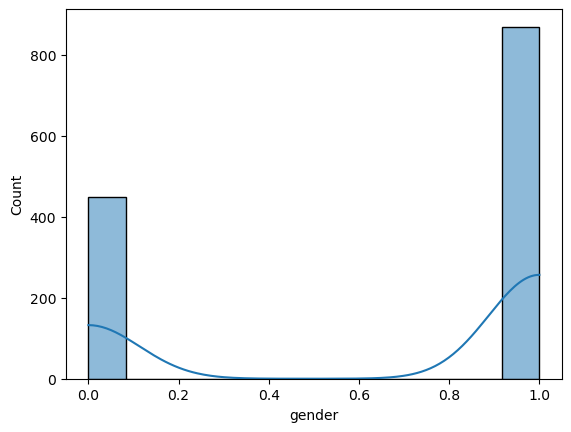

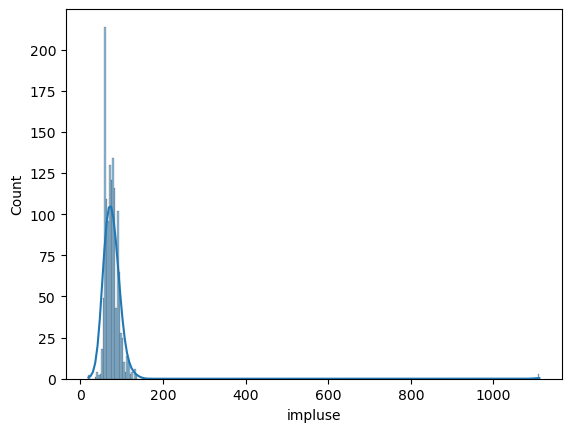

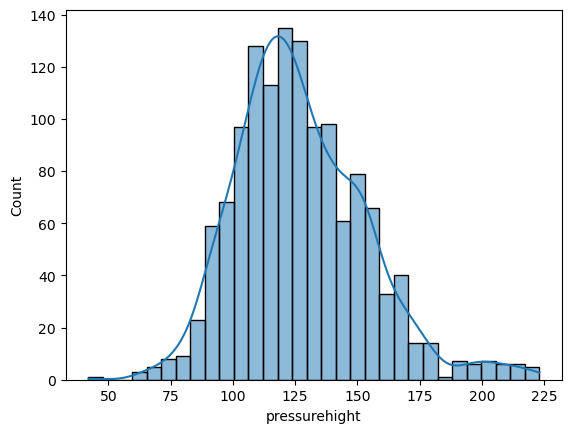

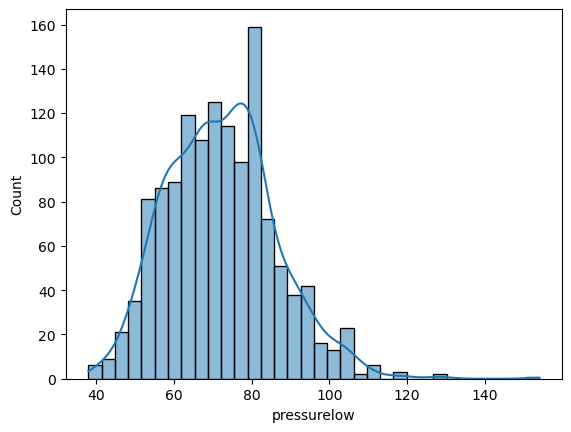

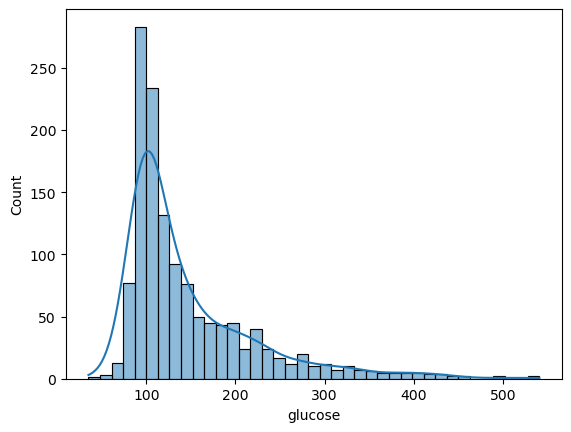

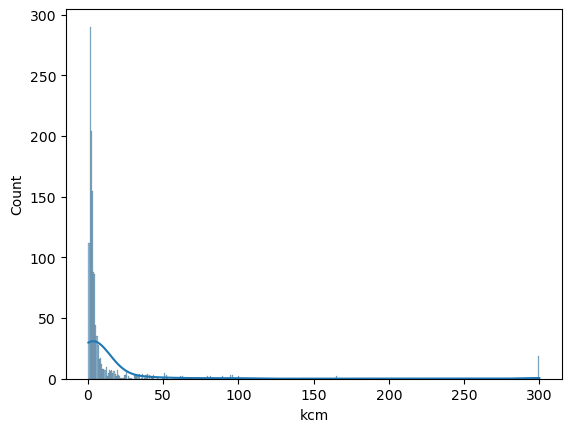

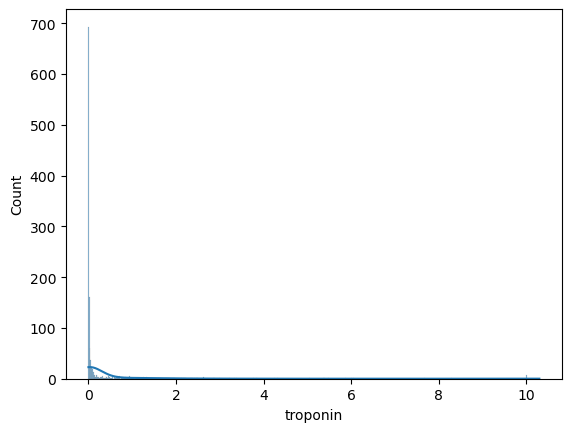

In [10]:
for i in df.select_dtypes(include=['number']).columns:
  sns.histplot(df[i],kde=True)
  plt.show()

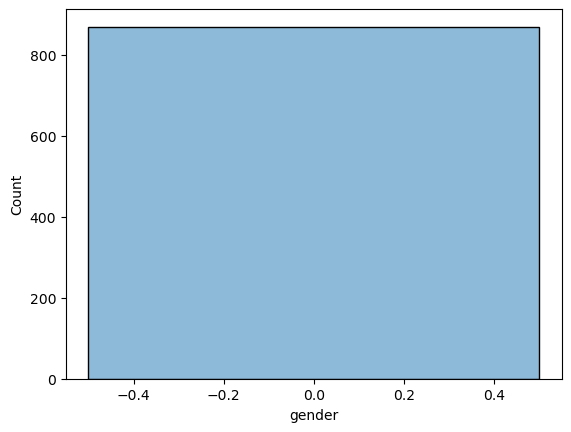

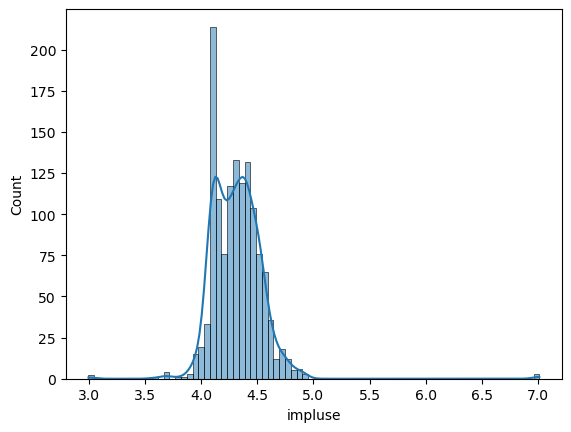

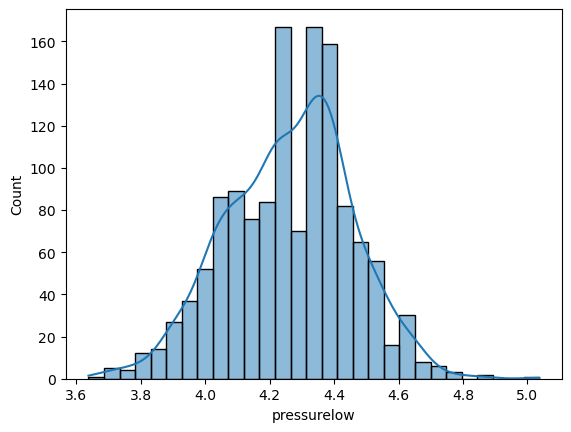

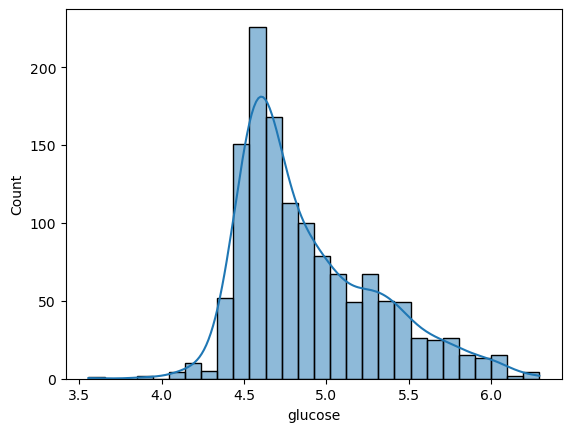

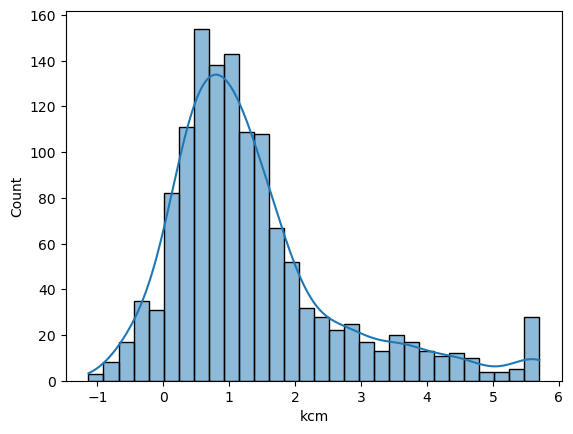

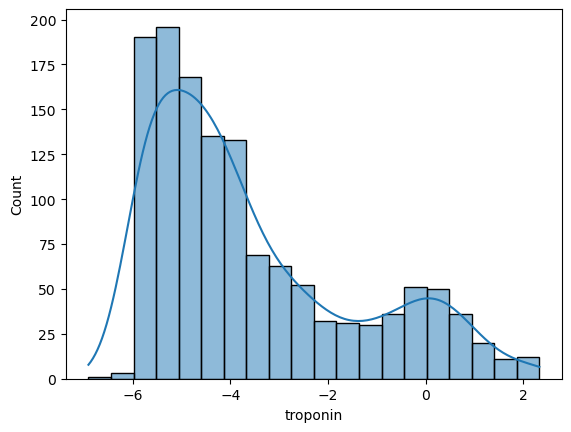

In [11]:
for i in ['gender', 'impluse', 'pressurelow', 'glucose','kcm', 'troponin']:
  sns.histplot(np.log(df[i]),kde=True)
  plt.show()

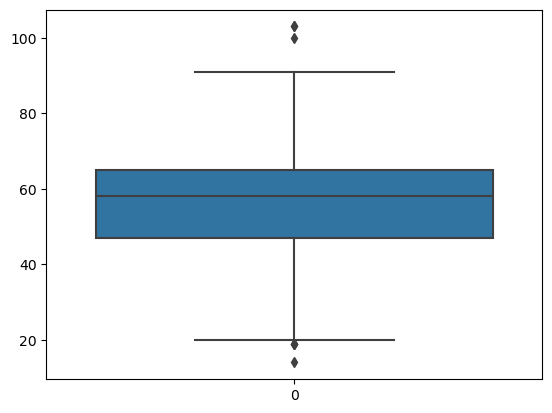

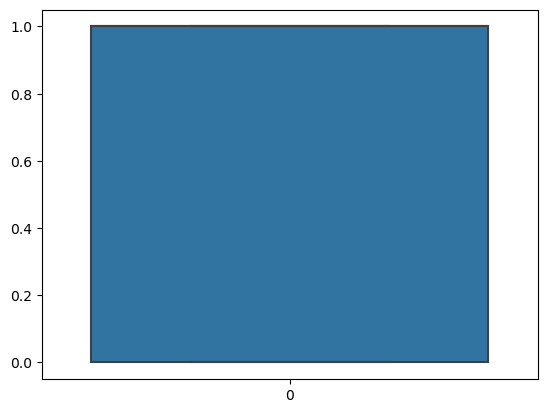

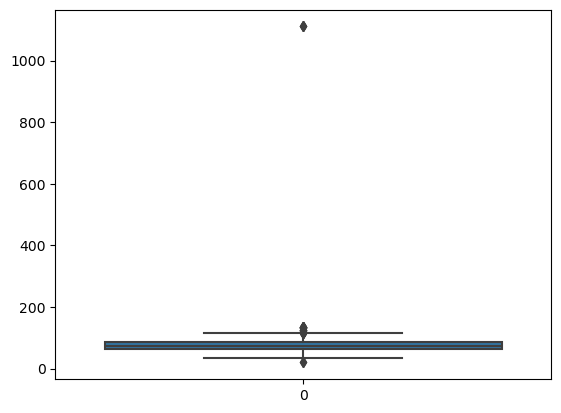

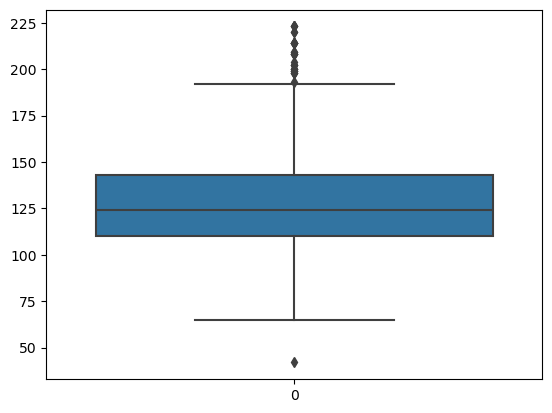

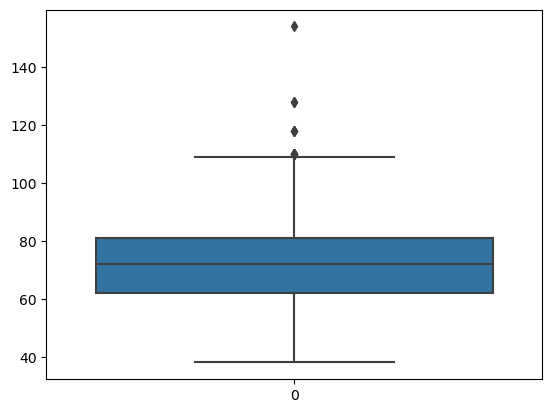

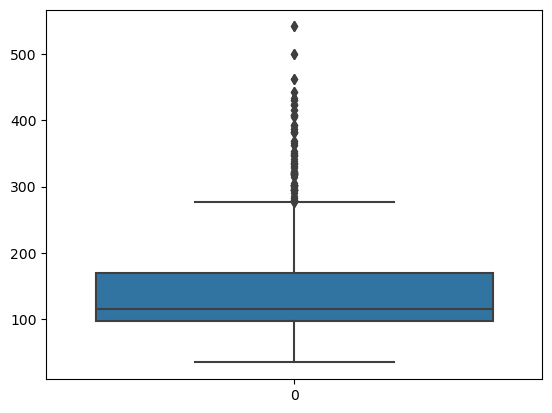

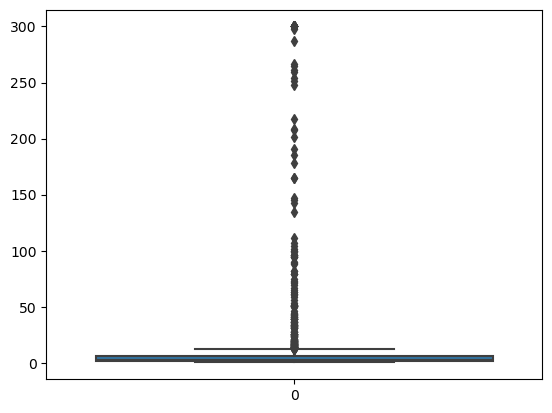

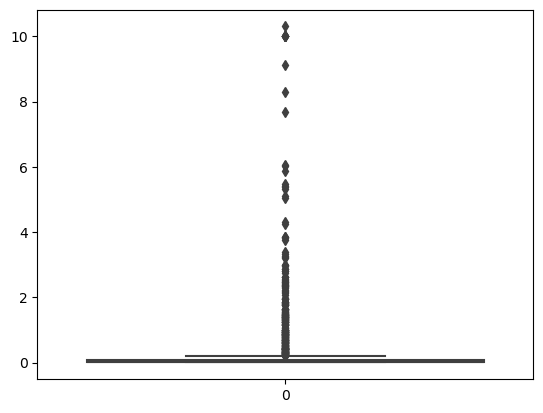

In [12]:
for i in df.select_dtypes(include=['number']).columns:
  sns.boxplot(df[i])
  plt.show()

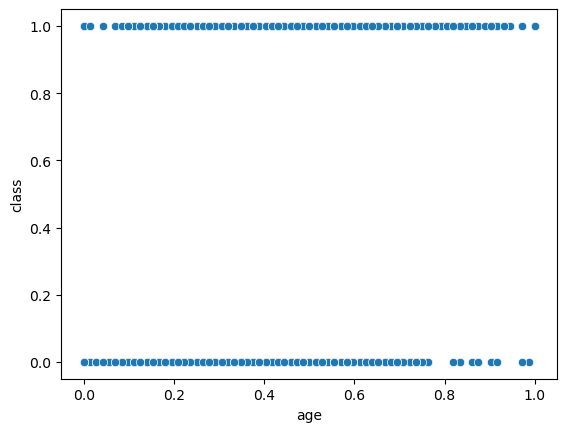

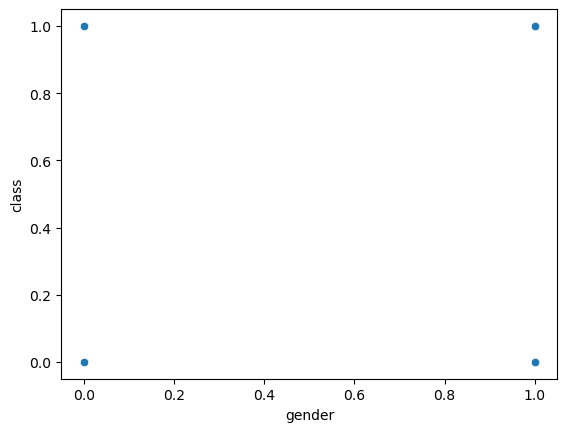

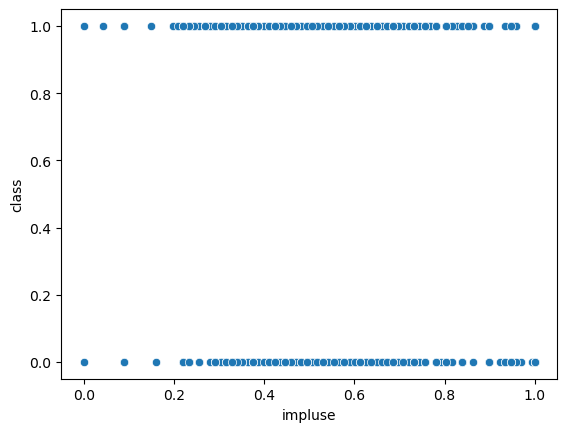

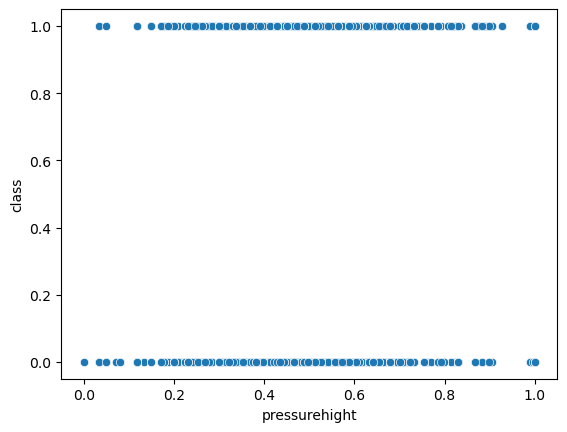

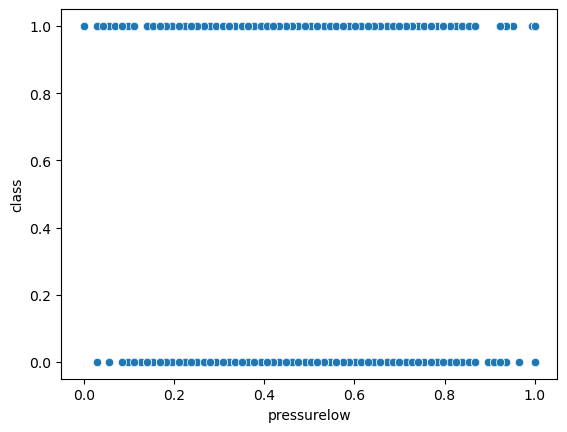

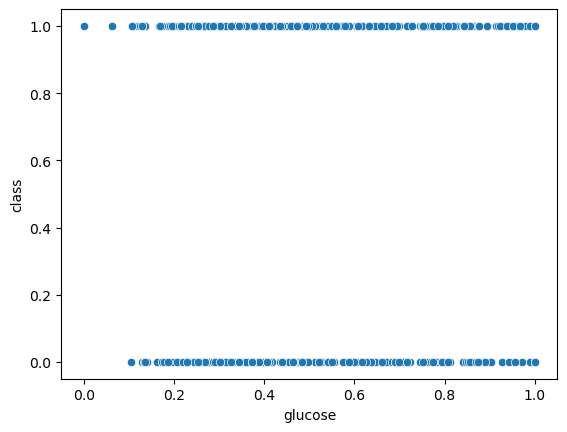

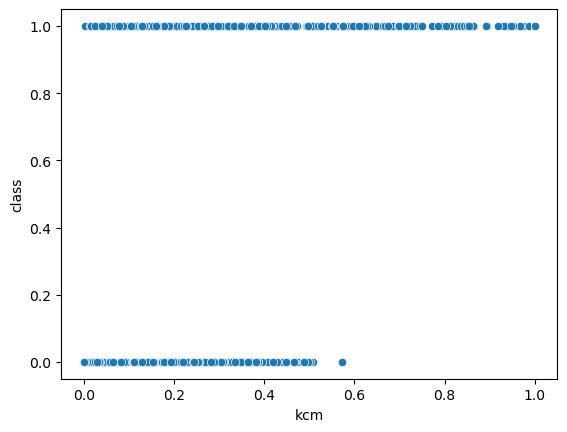

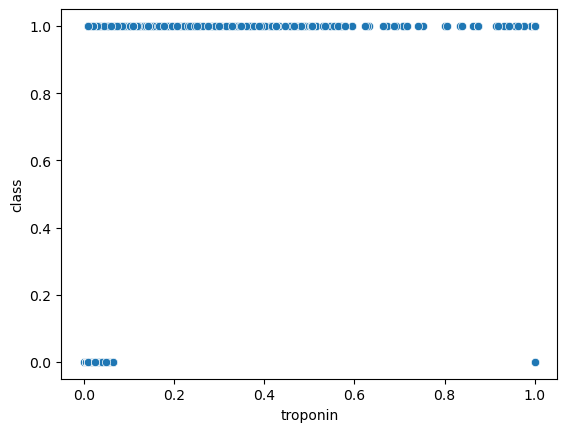

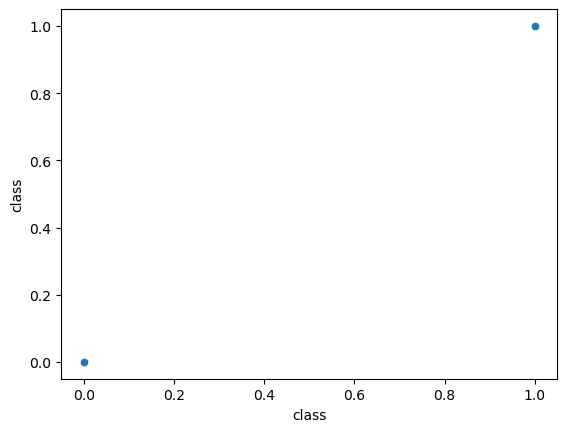

In [32]:
for i in df.select_dtypes(include=['number']).columns:
  sns.scatterplot(data=df,x=i,y="class")
  plt.show()

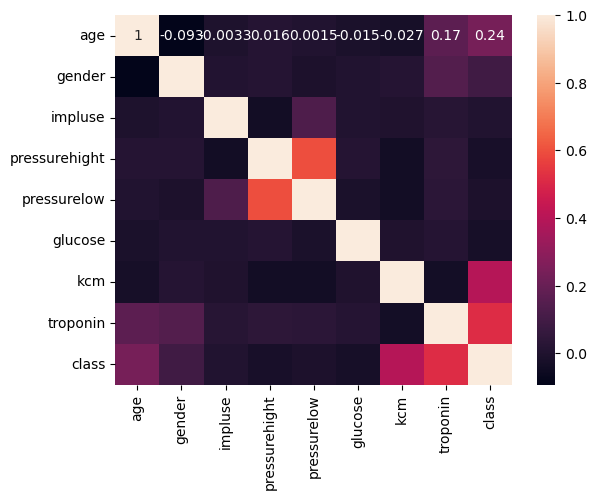

In [33]:

  sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)
  plt.show()

In [13]:
def wisker(col):
   q1=df[col].quantile(0.25)
   q3=df[col].quantile(0.75)
   iqr=q3-q1
   lower=q1-(1.5*iqr)
   upper=q3+(1.5*iqr)
   return lower,upper

In [14]:
for i in df.select_dtypes(include=['number']).columns:
  lower,upper=wisker(i)
  df[i]=np.where(df[i]<lower,lower,df[i])   
  df[i]=np.where(df[i]>upper,upper,df[i])

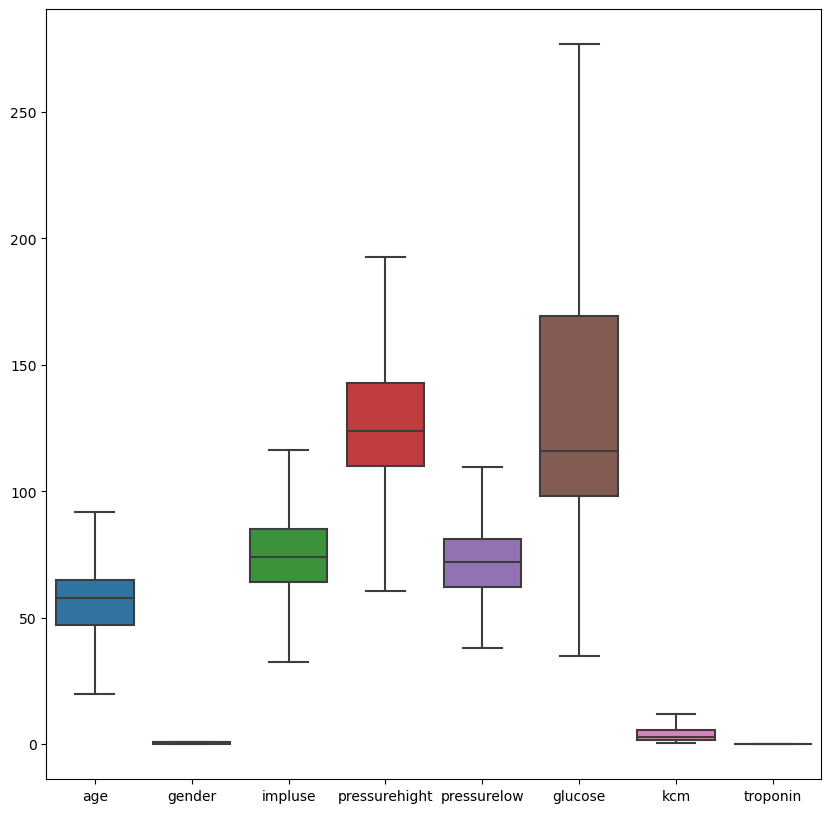

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot( df.select_dtypes(include=['number']))
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le=LabelEncoder()

In [17]:
for i in df.select_dtypes(include=['object']).columns:
  df[i]=le.fit_transform(df[i])

In [18]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

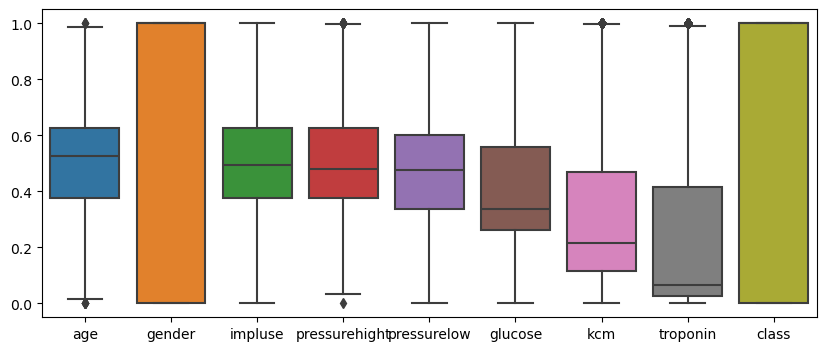

In [37]:
plt.figure(figsize=(10,4))
sns.boxplot( df.select_dtypes(include=['number']))
plt.show()

In [19]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.611111,1.0,0.398810,0.753788,0.629371,0.517063,0.126313,0.053988,0
1,0.013889,1.0,0.732143,0.284091,0.111888,1.000000,0.549065,1.000000,1
2,0.486111,1.0,0.375000,0.753788,0.545455,0.972079,0.142540,0.009816,0
3,0.611111,1.0,0.446429,0.450758,0.237762,0.972079,1.000000,0.593865,1
4,0.486111,1.0,0.375000,0.390152,0.377622,1.000000,0.064822,0.009816,0


In [20]:
x=df.drop("class",axis=1)
y=df["class"]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_train, y_train)
y_pred=RF.predict(x_test)
from sklearn.metrics import accuracy_score
train_score = RF.score(x_train, y_train)
print(f'Training Score : {train_score}')
print("accuracy_score : ",accuracy_score(y_test,y_pred)*100)

Training Score : 1.0
accuracy_score :  97.97979797979798


In [23]:
from sklearn.metrics import classification_report

y_pred = RF.predict(x_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       569

    accuracy                           1.00       923
   macro avg       1.00      1.00      1.00       923
weighted avg       1.00      1.00      1.00       923



In [24]:
import mlflow

In [25]:
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']="

In [26]:
mlflow.set_experiment("heart_attack_prediction")
mlflow.set_experiment_tag("heart_attack-tag",'ex1')

In [31]:
 with mlflow.start_run():    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import accuracy_score
    
    # model object initialization
    RandFor=RandomForestClassifier(n_estimators=500)# max_depth=5)
    GBM=GradientBoostingClassifier(n_estimators=500,learning_rate=1) #max_depth=5 ,min_samples_split=5)
    rf_n_estimators=500
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    #mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',500)
    #mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',1)
    #mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(x_train,y_train)
    gbm=GBM.fit(x_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(x_train,y_train)
    training_score_gbm=GBM.score(x_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(x_test)
    y_pred_gbm=gbm.predict(x_test)
    
    #prediction evaluations
    testing_score_rf=accuracy_score(y_pred_rf,y_test)
    testing_score_gbm=accuracy_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_testing_score", testing_score_rf)
    mlflow.log_metric("gbm_testing_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")

In [41]:
import requests
import json

data = {'dataframe_records': pd.DataFrame(x_test).values.tolist()}
headers = {"Content-Type": "application/json"}

response = requests.post("http://localhost:8001/invocations", data=json.dumps(data), headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,